К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

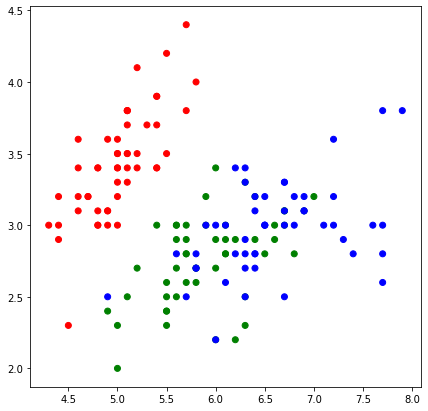

In [3]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [4]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [5]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [6]:
def knn_weights(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        # classes = {class_item: 0 for class_item in set(y_train)}
        weights = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            # classes[d[1]] += 1
            # Вместо 1 будем прибавлять q**d (q возьмем 0.5)
            weights[d[1]] += 0.5 ** d[0]

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(weights, key=weights.get)[-1])
    return answers

In [7]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [8]:
k = 1

y_pred = knn(X_train, y_train, X_test, k)
y_pred_weights = knn_weights(X_train, y_train, X_test, k)

print(f'Точность алгоритма без учета весов при k = {k}: {accuracy(y_pred, y_test):.3f}')
print(f'Точность алгоритма  с учетом весов при k = {k}: {accuracy(y_pred_weights, y_test):.3f}')

Точность алгоритма без учета весов при k = 1: 0.667
Точность алгоритма  с учетом весов при k = 1: 0.667


In [9]:
k = 2

y_pred = knn(X_train, y_train, X_test, k)
y_pred_weights = knn_weights(X_train, y_train, X_test, k)

print(f'Точность алгоритма без учета весов при k = {k}: {accuracy(y_pred, y_test):.3f}')
print(f'Точность алгоритма  с учетом весов при k = {k}: {accuracy(y_pred_weights, y_test):.3f}')

Точность алгоритма без учета весов при k = 2: 0.667
Точность алгоритма  с учетом весов при k = 2: 0.733


In [10]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)
y_pred_weights = knn_weights(X_train, y_train, X_test, k)

print(f'Точность алгоритма без учета весов при k = {k}: {accuracy(y_pred, y_test):.3f}')
print(f'Точность алгоритма  с учетом весов при k = {k}: {accuracy(y_pred_weights, y_test):.3f}')

Точность алгоритма без учета весов при k = 5: 0.867
Точность алгоритма  с учетом весов при k = 5: 0.867


In [11]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)
y_pred_weights = knn_weights(X_train, y_train, X_test, k)

print(f'Точность алгоритма без учета весов при k = {k}: {accuracy(y_pred, y_test):.3f}')
print(f'Точность алгоритма  с учетом весов при k = {k}: {accuracy(y_pred_weights, y_test):.3f}')

Точность алгоритма без учета весов при k = 10: 0.833
Точность алгоритма  с учетом весов при k = 10: 0.867


2*. Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [12]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

In [13]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [14]:
# Среднее квадратичное внутриклассовое расстояние
def metric_mskd(centroids, classes):
    n = range(len(classes)) # Количество кластеров
    k = [len(classes[x]) for x in n] # Количество объектов по кластерам
    distances = [sum(sum((classes[x] - centroids[x])**2)) for x in n]
    result = sum([distances[x] / k[x] for x in n])
    
    return result


In [15]:
# График зависимости среднего квадратичного внутриклассового расстояния от количества кластеров
def mskd_plot(data, k, max_iterations, min_distance):
    plt.xlabel('Cluster number')
    plt.ylabel('MSKD')
    plt.xlim(0, k+1)
    
    mskd = []
    for x in range(1, k+1):
        centroids, clusters = kmeans(data, x, max_iterations, min_distance)
        mskd.append(metric_mskd(centroids, clusters))
  
    plt.plot(list(range(1, k+1)), mskd, label='MSKD')
    plt.legend(loc='upper right')
    plt.show()

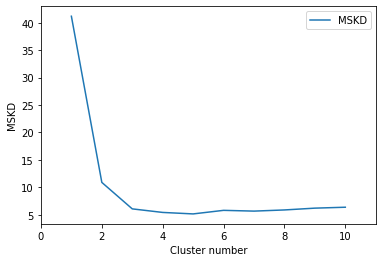

In [16]:
# определим максимальное количество итераций
max_iterations = 10

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# Максимальное количество кластеров
k = 10

mskd_plot(X, k, max_iterations, min_distance)